# Class 03 Deep Learning - Classification

In [1]:
# Silence TF messages
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
# https://www.cs.toronto.edu/~kriz/cifar.html
(images_train, labels_train), (images_test, labels_test) = datasets.cifar10.load_data()

### Data Preparation

In [4]:
images_train = images_train / 255.0
images_test = images_test / 255.0

In [5]:
name_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

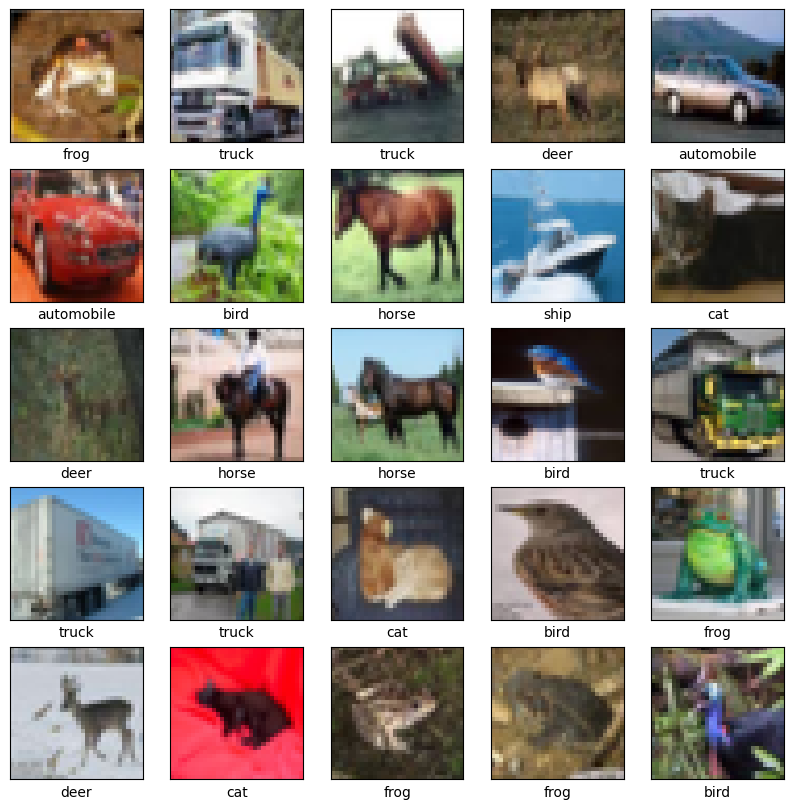

In [6]:
plt.figure(figsize = (10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train[i], cmap = plt.cm.binary)
    plt.xlabel(name_labels[labels_train[i][0]])

plt.show()

### Classification Modeling

![diagram](./images/convnet.jpg)

In [7]:
# feature Learning
model = models.Sequential()

# first layer
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# intermediary layer
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))

# intermediary layer
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))

In [8]:
# classification
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [9]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
history = model.fit(images_train, labels_train, epochs = 3, validation_data = (images_test, labels_test))

Epoch 1/3


1563/1563 [==============================] - 25s 14ms/step - loss: 1.5868 - accuracy: 0.4174 - val_loss: 1.3490 - val_accuracy: 0.5080
Epoch 2/3
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2329 - accuracy: 0.5577 - val_loss: 1.1825 - val_accuracy: 0.5784
Epoch 3/3
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0865 - accuracy: 0.6176 - val_loss: 1.0418 - val_accuracy: 0.6352


In [11]:
loss_test, acc_test = model.evaluate(images_test, labels_test, verbose=2)
percent_acc = acc_test * 100
print(f"Acurácia com dados de teste: {percent_acc:.2f}%")

313/313 - 2s - loss: 1.0418 - accuracy: 0.6352 - 2s/epoch - 6ms/step
Acurácia com dados de teste: 63.52%


### Model Deploy

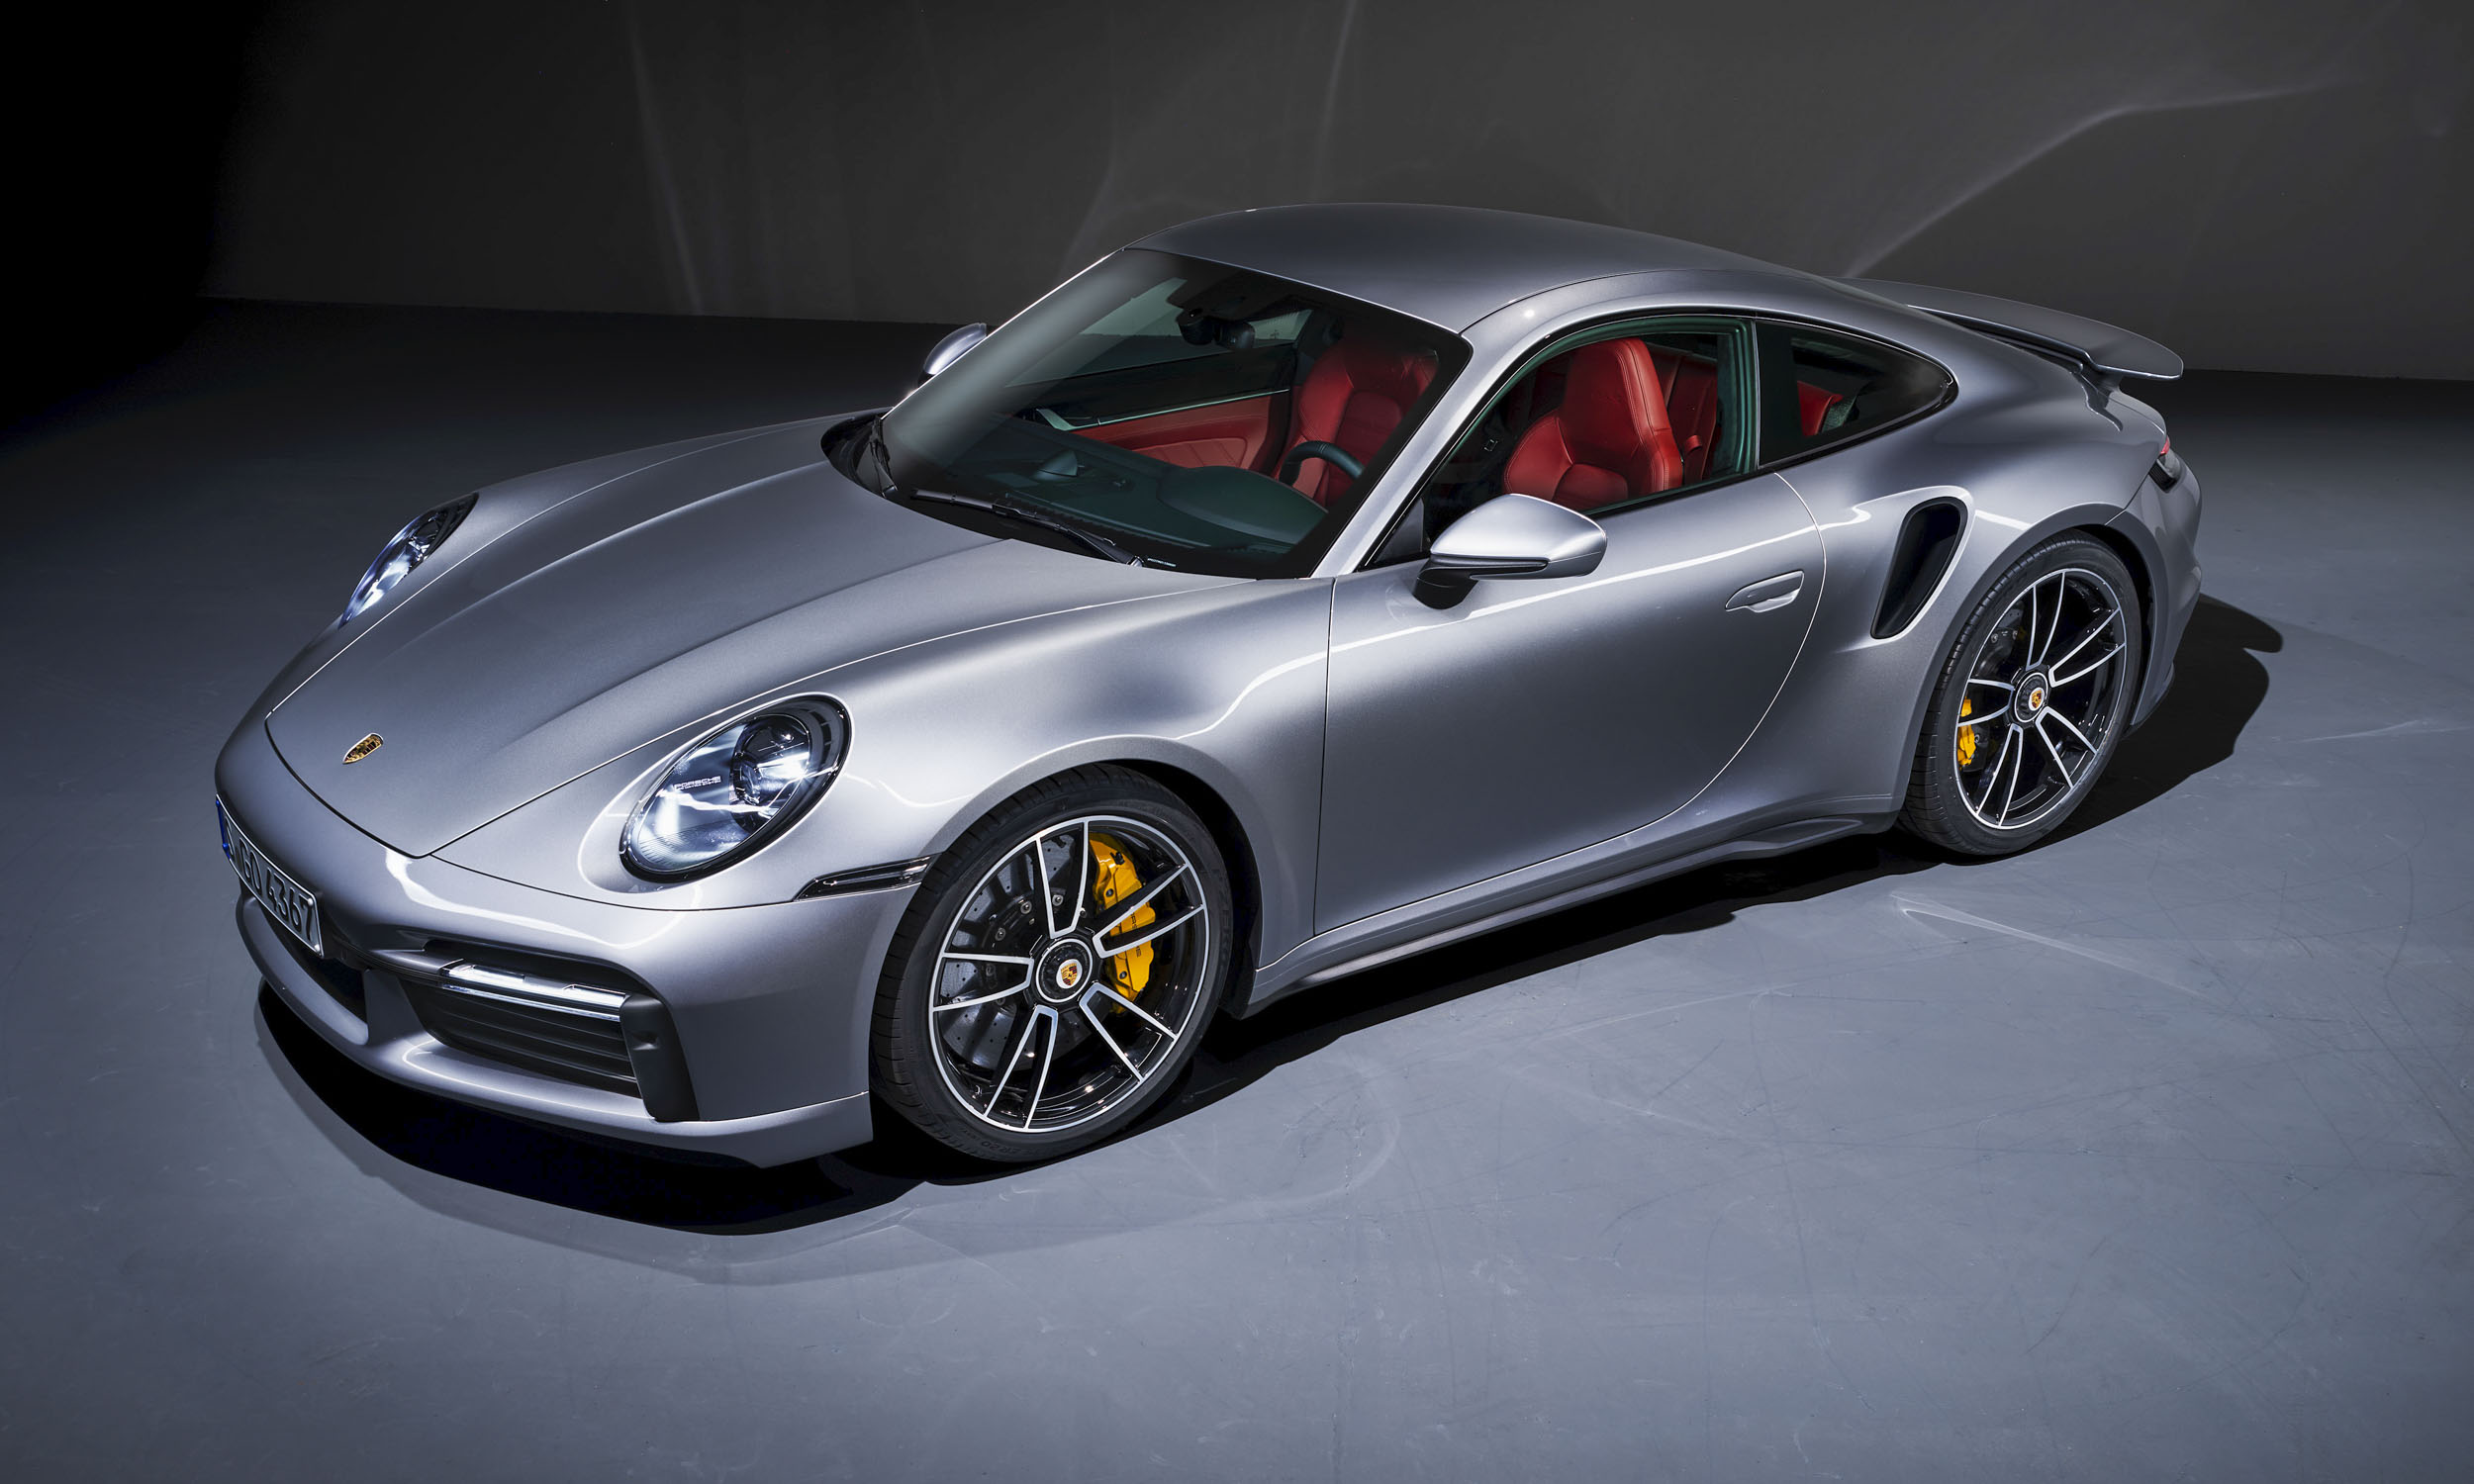

In [12]:
new_image = Image.open("./images/porsche-911.png")
new_image

In [13]:
new_image.size

(2500, 1500)

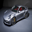

In [14]:
new_image = new_image.resize((32, 32))
new_image

In [15]:
new_image = np.array(new_image) / 255.0
new_image

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.22352941, 0.22352941, 0.22352941],
        [0.21176471, 0.21176471, 0.21960784],
        [0.2       , 0.2       , 0.20392157]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.23529412, 0.23529412, 0.24705882],
        [0.21960784, 0.21568627, 0.22745098],
        [0.20392157, 0.2       , 0.21176471]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.22745098, 0.22745098, 0.23529412],
        [0.21568627, 0.21568627, 0.21960784],
        [0.20784314, 0.20392157, 0.21568627]],

       ...,

       [[0.25098039, 0.2745098 , 0.32941176],
        [0.2627451 , 0.28627451, 0.34509804],
        [0.27058824, 0

In [16]:
new_image = np.expand_dims(new_image, axis=0)
new_image

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.22352941, 0.22352941, 0.22352941],
         [0.21176471, 0.21176471, 0.21960784],
         [0.2       , 0.2       , 0.20392157]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.23529412, 0.23529412, 0.24705882],
         [0.21960784, 0.21568627, 0.22745098],
         [0.20392157, 0.2       , 0.21176471]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.22745098, 0.22745098, 0.23529412],
         [0.21568627, 0.21568627, 0.21960784],
         [0.20784314, 0.20392157, 0.21568627]],

        ...,

        [[0.25098039, 0.2745098 , 0.32941176],
         [0.2627451 , 0.28627451, 0.34509804]

In [17]:
forecast = model.predict(new_image)
forecast

1/1 [==============================] - 0s 231ms/step


array([[2.6560755e-02, 9.0654576e-01, 1.5423037e-03, 3.1003726e-04,
        3.3729899e-04, 4.7848513e-05, 1.5482462e-03, 4.3356904e-06,
        3.9712064e-02, 2.3391370e-02]], dtype=float32)

In [18]:
forecast_label = np.argmax(forecast)
name_labels[forecast_label]

'automobile'